In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

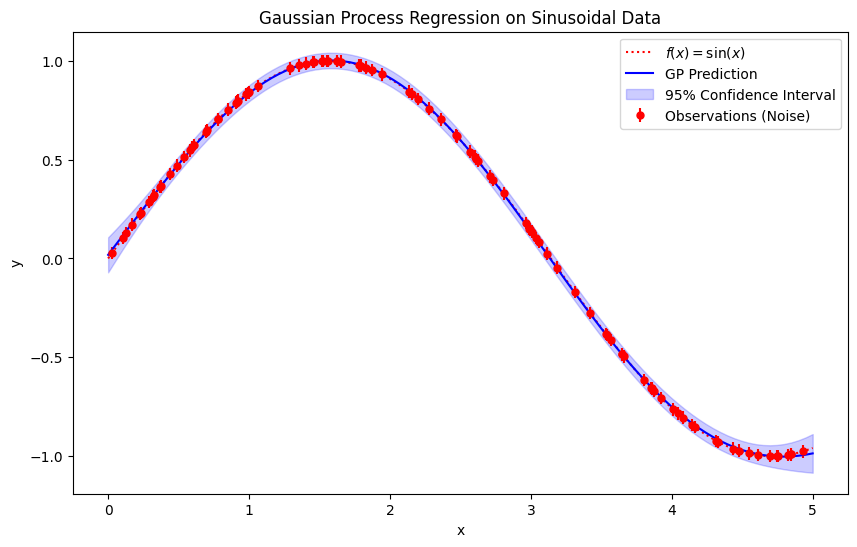

In [2]:
# 1. 設定隨機種子以確保結果可重複
np.random.seed(42)

# 2. 生成資料
# 定義函數 y = sin(x) + e, e ~ N(0, 0.001)
def target_func(x):
    return np.sin(x)

n_samples = 100
X_train = np.sort(np.random.uniform(0, 5, n_samples))[:, np.newaxis]
noise = 0 #np.random.normal(0, np.sqrt(0.001), n_samples)
y_train = target_func(X_train).ravel() + noise

# 3. 定義高斯過程核函數 (Kernel)
# 我們使用 RBF (徑向基函數) 並加上一個常數項
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

# 4. 建立並訓練高斯過程回歸模型
# alpha 是雜訊的變異數 (0.001)
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.01, n_restarts_optimizer=10)
gp.fit(X_train, y_train)

# 5. 進行預測
X_plot = np.linspace(0, 5, 100)[:, np.newaxis]
y_pred, sigma = gp.predict(X_plot, return_std=True)

# 6. 繪圖
plt.figure(figsize=(10, 6))
plt.plot(X_plot, target_func(X_plot), 'r:', label=r'$f(x) = \sin(x)$')
plt.errorbar(X_train.ravel(), y_train, 0.0316, fmt='r.', markersize=10, label='Observations (Noise)')
plt.plot(X_plot, y_pred, 'b-', label='GP Prediction')
plt.fill_between(X_plot.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, 
                 alpha=0.2, color='blue', label='95% Confidence Interval')
plt.title("Gaussian Process Regression on Sinusoidal Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper right")
plt.show()